## Creating Plots and Figures
### Matplotlib

In [1]:
import os
import pandas as pd
import numpy as np

directory = './../data/measurements/'
csv_list = sorted(os.listdir(directory))

df_list = []
for csv_name in csv_list:
    df_list.append(pd.read_csv(directory + csv_name))

df_full = pd.concat(df_list)
def circularity(regionprops):
    """    
    Calculate circularity according to most common definition
    circularity = 4 PI Area / Perimeter^2
    
    Input: regionprops is a dict object returned by regionprops_table
    Output: same object with new circularity key:values
    """
    return 4 * np.pi * regionprops['area'] / (regionprops['perimeter']**2)

df_full['circularity'] = circularity(df_full)
df_full['cell_line'] = df_full['filename'].str.split('_', expand=True)[0]

In [2]:
from matplotlib import pyplot as plt

# Single panel figure
plt.hist(df_full['eccentricity'])
plt.xlabel('Eccentricity')
plt.ylabel('Occurences')
plt.show()

In [3]:
# Multiple panels figure

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].hist(df_full['eccentricity'], bins=20)
axes[1].hist(df_full['equivalent_diameter_area'], bins=20)

axes[0].set_xlabel('Eccentricity')
axes[0].set_ylabel('Occurences')
axes[1].set_xlabel('Estimated Diameter [px]')
axes[1].set_ylabel('Occurences')

axes[0].set_title('To check if cells are round')
axes[1].set_title('To check if values make sense')
plt.show()

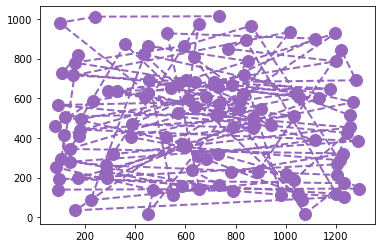

In [4]:
plt.plot(df_full['centroid-1'], df_full['centroid-0'], color='tab:purple', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.show()

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(df_full['area'], df_full['perimeter'])
axes[1].scatter(df_full['eccentricity'], df_full['circularity'])

plt.show()

In [6]:
# define category of circularity
df_full['circ_cat'] = np.where(df_full['circularity'] > 0.9, 'round', 'elliptical')

plt.plot(df_full[df_full['circ_cat'] == 'round']['centroid-1'], df_full[df_full['circ_cat'] == 'round']['centroid-0'], 'o')
plt.plot(df_full[df_full['circ_cat'] == 'elliptical']['centroid-1'], df_full[df_full['circ_cat'] == 'elliptical']['centroid-0'], 's')

plt.show()

In [7]:
# Show an image inside a plot
from skimage.io import imread
filename_full = df_full['filename'].values[0]
filename = filename_full.replace('_cp_masks','')

directory = './../data/raw_images/'
img = imread(directory + filename)

plt.imshow(img, cmap='gray')
plt.scatter(df_full[df_full['filename'] == filename_full]['centroid-1'], df_full[df_full['filename'] == filename_full]['centroid-0'], c='red', marker='x')
plt.axis('off')
plt.show()

### Seaborn

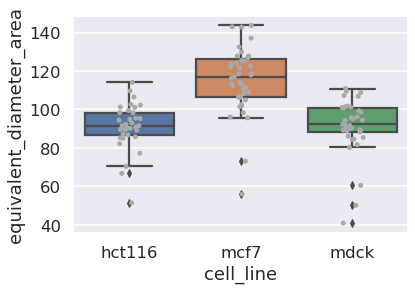

In [8]:
import seaborn as sns

sns.set(context='talk', style='darkgrid')

sns.boxplot(data=df_full, x='cell_line', y='equivalent_diameter_area')
sns.stripplot(data=df_full, x='cell_line', y='equivalent_diameter_area', color='darkgray')

plt.show()

In [9]:
sns.boxplot(data=df_full, x='cell_line', y='equivalent_diameter_area', hue='circ_cat')
plt.legend(bbox_to_anchor=(1,1))

plt.show()